## Imports

In [1]:
import os
import rarfile
import requests
import pandas as pd
from typing import List
from io import StringIO 
from datetime import date

from bs4 import BeautifulSoup
from jita.settings.credentials import (
    qqp,
    datos_abiertos, 
    gasolina_hmo,
    casa_ley
)

year = str(date.today().year)

### qqp

In [ ]:
page = requests.get(qqp)
soup = BeautifulSoup(page.content, 'lxml')
download_link = None
for index, link in enumerate(soup.find_all('a')):
    if year in link.text:
        download_link = link['href']
        break
    
if download_link:
    url = os.path.join(datos_abiertos, download_link)
    rar_response = requests.get(url)
    rar_response.raise_for_status()

    with open('temp.rar', 'wb') as f:
        f.write(rar_response.content)

    with rarfile.RarFile('temp.rar') as rf:
        csv_name = rf.namelist()[-2] 
        print(f"Extrayendo y leyendo: {csv_name}")

        with rf.open(csv_name) as csv_file_in_rar:
            df_qqp = pd.read_csv(csv_file_in_rar, encoding='utf-8', header=None)

os.remove('temp.rar')

In [6]:
nombres_columnas = [
    'PRODUCTO',
    'PRESENTACION',
    'MARCA',
    'CATEGORIA',
    'CATALOGO',
    'PRECIO',
    'FECHAREGISTRO',
    'CADENACOMERCIAL',
    'GIRO',
    'NOMBRECOMERCIAL', # Cambiado de 'NOMBRE_SUCURSAL' para coincidir con tu lista
    'DIRECCION',
    'ESTADO', # Movido para coincidir con el orden
    'MUNICIPIO', # Movido para coincidir con el orden
    'LATITUD',
    'LONGITUD'
]

df_qqp.columns = nombres_columnas

In [12]:
df_qqp[df_qqp['ESTADO'] == 'SONORA'].tail()

PRODUCTO                                     PRESENTACION  \
389178           PLÁTANO  1 KG. GRANEL. TABASCO/CHIAPAS/ROATÁN/PORTALIMÓN   
389179           SARDINA                           LATA 425 GR. EN TOMATE   
389180           SARDINA                           LATA 425 GR. EN TOMATE   
389181  TORTILLA DE MAÍZ                                     1 KG. GRANEL   
389182         ZANAHORIA                            1 KG. GRANEL. MEDIANA   

          MARCA                        CATEGORIA CATALOGO  PRECIO  \
389178      S/M                   FRUTAS FRESCAS    PACIC    23.9   
389179  AURRERA  PESCADOS Y MARISCOS EN CONSERVA    PACIC    18.0   
389180  GUAYMEX  PESCADOS Y MARISCOS EN CONSERVA    PACIC    43.0   
389181      S/M   TORTILLAS Y DERIVADOS DEL MAIZ    PACIC    14.5   
389182      S/M               HORTALIZAS FRESCAS    PACIC    14.9   

       FECHAREGISTRO CADENACOMERCIAL                                   GIRO  \
389178    2025-08-29        WAL-MART  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
389179    2025-08-29        WAL-MART  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
389180    2025-08-29        WAL-MART  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
389181    2025-08-29        WAL-MART  SUPERMERCADO / TIENDA DE AUTOSERVICIO   
389182    2025-08-29        WAL-MART  SUPERMERCADO / TIENDA DE AUTOSERVICIO   

                    NOMBRECOMERCIAL  \
389178  WALMART SUCURSAL HERMOSILLO   
389179  WALMART SUCURSAL HERMOSILLO   
389180  WALMART SUCURSAL HERMOSILLO   
389181  WALMART SUCURSAL HERMOSILLO   
389182  WALMART SUCURSAL HERMOSILLO   

                                                DIRECCION  ESTADO   MUNICIPIO  \
389178  PASEO RÍO SONORA NO. 37A SUR, ESQ. BLVD. SOLID...  SONORA  HERMOSILLO   
389179  PASEO RÍO SONORA NO. 37A SUR, ESQ. BLVD. SOLID...  SONORA  HERMOSILLO   
389180  PASEO RÍO SONORA NO. 37A SUR, ESQ. BLVD. SOLID...  SONORA  HERMOSILLO   
389181  PASEO RÍO SONORA NO. 37A SUR, ESQ. BLVD. SOLID...  SONORA  HERMOSILLO   
389182  PASEO RÍO SONORA NO. 37A SUR, ESQ. BLVD. SOLID...  SONORA  HERMOSILLO   

          LATITUD    LONGITUD  
389178  29.066837 -110.967247  
389179  29.066837 -110.967247  
389180  29.066837 -110.967247  
389181  29.066837 -110.967247  
389182  29.066837 -110.967247

### gasolina

In [4]:
page = requests.get(gasolina_hmo)
soup = BeautifulSoup(page.content, 'lxml')
rows = []

for tr in soup.find_all('tr'):
    tds = tr.find_all('td', attrs={'data-label': True})
    if not tds:
        continue
    row = {td['data-label']: td.get_text(strip=True) for td in tds}
    rows.append(row)

In [5]:
pd.DataFrame(rows)

Gasolinera  \
0                      ESTACION PIRU, S.A. DE C.V.   
1                  GASERVICIO SANTA CLARA SA DE CV   
2                GASERVICIO HERMOSUR, S.A. DE C.V.   
3                   SERVICIO EL KENO, S.A. DE C.V.   
4    GASOLINERA RENDIMAS DEL NOROESTE S.A. DE S.V.   
..                                             ...   
144                        EL CHARRO GASOLINERA SA   
145                 SERVICIO EL KENO, S.A. DE C.V.   
146                          SERVICIOS Z3 SA DE CV   
147                  AUTOSERVICIO PALMIRA SA DE CV   
148              ESTACION  DEC VERACRUZ S.A DE C.V   

                                             Dirección  Magna Premium Diesel  
0    Boulevard Luis Encinas Y Manuel R. Bobadilla S/N.  21.99   24.99         
1    Carretera Fed. No. 15 Tramo Hermosillo-Guaymas...  22.99   25.49  24.69  
2                Boulevard Manuel J. Clouthier No. 275  22.99   25.49  17.09  
3                                  José Ma Mendoza 794  20.99   22.99  22.79  
4    Boulevard Periférico Oriente S/N Esquina Con C...  22.59   24.89  24.69  
..                                                 ...    ...     ...    ...  
144      Veracruz No. 263 Esquina Francisco Monteverde  22.91   26.09         
145                Avenida Periférico Poniente No. 239  20.99   22.99         
146                  Boulevard Ignacio Salazar No. 860  22.97   25.96         
147                   Boulevard García Morales No. 202  22.29   25.09  24.49  
148                        Veracruz Y Garmendia No. 71  22.95    25.2         

[149 rows x 5 columns]

### Casa Ley

#### selenium

In [16]:
import os
import re
import requests
import datetime
from datetime import date
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

from jita.settings.config import CASA_LEY_DATA
from jita.settings.credentials import casa_ley 



HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
CARPETA_SALIDA = CASA_LEY_DATA 

def descargar_folleto_ley():
    """
    Función principal que encapsula toda la lógica de scraping y descarga.
    """

    urls_folleto = set()
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options=options)

    try:
        driver.get(casa_ley) 
        wait = WebDriverWait(driver, 20)
        print("⏳ Esperando que el iframe del folleto se cargue...")

        iframe = wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, 'iframe[src*="publitas.com"]')))
        driver.switch_to.frame(iframe)
        print("✅ Iframe encontrado. Accediendo al folleto...")

        wait.until(EC.visibility_of_element_located((By.CLASS_NAME, "left")))
        print("✅ Folleto inicial cargado.")

        while True:
            try:
                imagen_actual = driver.find_element(By.CSS_SELECTOR, "img.left").get_attribute('src')
            except:
                imagen_actual = "" 

            soup = BeautifulSoup(driver.page_source, 'lxml')
            
            for img in soup.select('img.left, img.right'):
                url_baja = img.get('src')
                if url_baja and 'publitas' in url_baja:
                    url_alta = re.sub(r'-at\d+', '-at2400', url_baja)
                    if url_alta not in urls_folleto:
                        print(f"📄 Página encontrada: {url_alta}")
                        urls_folleto.add(url_alta)

            try:
                next_button = driver.find_element(By.ID, "next_slide")
                if 'disabled' in next_button.get_attribute('class'):
                    print("🔚 Botón 'Siguiente' deshabilitado. Fin del folleto.")
                    break
                
                print("▶️ Pasando a la siguiente página...")
                next_button.click()

                wait.until(
                    lambda d: d.find_element(By.CSS_SELECTOR, "img.left").get_attribute('src') != imagen_actual
                )

            except Exception:
                print("🔚 No se pudo encontrar o hacer clic en el botón 'Siguiente'. Terminando.")
                break
    finally:
        driver.quit()
        print("\nNavegador cerrado.")

    lista_urls = sorted(list(urls_folleto))
    if lista_urls:
        print(f"\n--- Iniciando descarga de {len(lista_urls)} imágenes ---")
        for i, url in enumerate(lista_urls):
            try:
                timestamp = datetime.datetime.now().strftime("%d%m%Y")
                nombre_archivo = os.path.join(
                    CARPETA_SALIDA,
                    f"pagina_{i+1:02d}_{timestamp}.jpg"
                )
                response = requests.get(url, headers=HEADERS, timeout=30)
                response.raise_for_status()
                with open(nombre_archivo, 'wb') as f:
                    f.write(response.content)
                print(f"✅ Guardada: {nombre_archivo}")
            except requests.exceptions.RequestException as e:
                print(f"❌ Error al descargar {url}: {e}")
        print("\n🎉 ¡Proceso completado!")
    else:
        print("\nNo se encontraron URLs para descargar.")

if __name__ == "__main__":
    descargar_folleto_ley()

⏳ Esperando que el iframe del folleto se cargue...
✅ Iframe encontrado. Accediendo al folleto...
✅ Folleto inicial cargado.
📄 Página encontrada: https://view.publitas.com/89081/1913052/pages/36f9e53f-f8d0-49c8-a87f-f7fe37eba318-at2400.jpg
📄 Página encontrada: https://view.publitas.com/89081/1913052/pages/7efa1b9e-0d3a-4f9e-bf8b-17e79c78b6fd-at2400.jpg
▶️ Pasando a la siguiente página...
🔚 No se pudo encontrar o hacer clic en el botón 'Siguiente'. Terminando.

Navegador cerrado.

--- Iniciando descarga de 2 imágenes ---
✅ Guardada: C:\Users\angel.merino\Documents\GitHub\jita\datos\casa_ley\octubre_2025\pagina_01_01102025.jpg
✅ Guardada: C:\Users\angel.merino\Documents\GitHub\jita\datos\casa_ley\octubre_2025\pagina_02_01102025.jpg

🎉 ¡Proceso completado!


#### bs4

In [10]:
from jita.settings.config import CASA_LEY_DATA

In [3]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

page = requests.get(casa_ley, headers=headers)

soup = BeautifulSoup(page.content, 'lxml')

imgs_tag : List[str] = []
for tag in soup.find_all('img', class_='attachment-full'):
    imgs_tag.append(tag['src'])

if imgs_tag:
    print(f"✅ Se encontraron {len(imgs_tag)} imágenes. Iniciando descarga...")
    for url in imgs_tag:
        try:
            # 1. Extraemos el nombre del archivo de la URL
            nombre_archivo = url.split('/')[-1]
            print(f"📥 Descargando: {nombre_archivo}")
            
            # 2. Hacemos la solicitud para obtener la imagen (¡usando headers!)
            response_img = requests.get(url, headers=headers)
            response_img.raise_for_status() # Verifica si hay errores en la descarga
            
            # 3. Guardamos la imagen en la carpeta 'folletos' con su nombre original
            ruta_guardado = os.path.join(CASA_LEY_DATA, nombre_archivo)
            with open(ruta_guardado, 'wb') as f:
                f.write(response_img.content)
            
            print(f"   ✅ Guardado como: {ruta_guardado}")

        except requests.exceptions.RequestException as e:
            print(f"   ❌ Error al descargar {url}: {e}")
            
    print("\n🎉 ¡Proceso completado!")
else:
    print("❌ No se encontraron imágenes con la clase 'attachment-full'.")

❌ No se encontraron imágenes con la clase 'attachment-full'.


#### Extracción de texto

In [2]:
system_prompt = f"""
Eres un asistente que SOLO responde con JSON válido y nada más. 
Si no puedes identificar la información, devuelve un JSON vacío con la estructura. 
NO des explicaciones, NO uses enlaces, NO texto fuera del JSON.
Debes hacer OCR del texto de la imagen, interpretar las ofertas DE IZQUIERDA A DERECHA EN Z.
Debes devolver exclusivamente un JSON válido con la siguiente estructura:

Estructura:
{{
  "productos": [
    {{
      "nombre": "Nombre del producto, marca, o categoría",
      "precio": "Precio numérico COMPLETO con moneda SI es que se menciona",
      "oferta": "ej. 2x1, 3x2, 2x$precio, etc.",
      "presentación": "Cantidad y unidad kg, g, ml, L, etc.",
      "limites": "límite de compra máxima o mínima que aplica en la oferta",
      "condiciones": "Condiciones especiales para aplicar la oferta"
    }}
  ],
  "vigencia": "Fecha de los precios y ofertas válidas",
  "sucursales": "Sucursales donde aplican",
  "detalles" : "Detalles que se mencionan de forma general, como términos y condiciones."
}}

Ejemplo de salida:
{{
  "productos":[
    {{
      "nombre":"Leche Lala",
      "precio": null,
      "oferta":"2x$45",
      "presentación":"1L",
      "limites":"Máximo 4 por cliente"
    }},
    {{
      "nombre":"Platanos",
      "precio": "$20",
      "oferta": null,
      "presentación":"1 kg",
      "limites": null
    }},
    {{
      "nombre":"Cósmeticos L'Oreal",
      "precio": null,
      "oferta":"40%",
      "presentación":"todos los cósmeticos",
      "limites": null,
      "condiciones": "excepto lineadores"
    }}
  ],
  "vigencia":"del 23 al 29 de Septiembre 2025",
  "sucursales":"Todas las sucursales Casa Ley Hermosillo",
  "detalles":"Válido hasta agotar existencias"
}}

Si el producto está incompleto o ilegible, no lo incluyas.
Si un dato no aparece en el folleto, deja el campo en null o "".
Devuelve SIEMPRE un JSON válido.

Hoy es {date.today().isoformat()}, así que usa esta fecha como referencia si es necesario.
"""


In [3]:
import ollama
from PIL import Image
from jita.settings.config import CASA_LEY_DATA

casa_ley_folleto = f"{CASA_LEY_DATA}/window_0_1000.jpg"  # tu imagen
#casa_ley_folleto = f"{CASA_LEY_DATA}/pagina_01.jpg"  # tu imagen

##### gemma3:27b

In [6]:
def sliding_window_vertical(image_path, window_height=1000, overlap=100, path=None):
    """
    Recorre la imagen con una ventana vertical (window_height) con solape (overlap).
    """
    img = Image.open(image_path)
    width, height = img.size
    tiles = []
    step = window_height - overlap
    for top in range(0, height, step):
        bottom = min(top + window_height, height)
        tile = img.crop((0, top, width, bottom))
        filename = f"window_{top}_{bottom}.jpg"
        tile.save(f"{path}/{filename}", quality=100)
        tiles.append(f"{path}/{filename}")
        if bottom == height:
            break
    return tiles

In [7]:
tiles_vertical = sliding_window_vertical(casa_ley_folleto, path=CASA_LEY_DATA)

In [12]:
# No necesitas importar 'date' aquí, puedes pasar la fecha directamente.
from datetime import date

# La fecha se calcula una vez y se inserta en el f-string.
current_date = date.today().isoformat()

system_prompt = f"""
Eres un motor de extracción de datos de alta precisión.
Tu única misión es analizar imágenes de folletos de supermercados y convertirlas en un objeto JSON estructurado y válido.

Misión Principal
1.  Analiza la imagen: Procesa el contenido visual de manera metódica: de arriba hacia abajo y de izquierda a derecha.
2.  Asocia la información: Vincula correctamente cada precio, oferta y descripción con el producto más cercano. Infiere la información del contexto (ej. si el precio dice "/kg", la presentación es "1 kg").
3.  Genera el JSON: Construye un único objeto JSON que se adhiera estrictamente a la estructura y reglas definidas a continuación.

Estructura de Salida Obligatoria (JSON)
Devuelve EXCLUSIVAMENTE un objeto JSON con la siguiente estructura. No incluyas texto, explicaciones ni comentarios antes o después del JSON.

{{
  "productos": [
    {{
      "nombre": "string | null - Nombre específico del producto, incluyendo marca si es visible (ej. 'Limón con semilla', 'Queso Crema Philadelphia').",
      "precio": "string | null - El precio final por unidad. Si el precio es parte de una oferta (ej. 2x$99), este campo debe ser null.",
      "oferta": "string | null - La promoción aplicable. Usa formatos consistentes: '2x1', '3x2', '2x$99', '50%', '$10 de descuento'.",
      "presentacion": "string | null - La cantidad, peso o volumen del producto (ej. '1 kg', '900 g', '1 L', 'Caja con 10 tabletas').",
      "limites": "string | null - Límite de piezas o kilos por cliente (ej. 'Máximo 5 kg por cliente').",
      "condiciones": "string | null - Cualquier otra condición para que la oferta aplique (ej. 'En la compra de 1', 'Pagando con Tarjeta X')."
    }}
  ],
  "vigencia": "string | null - El periodo de validez exacto de las ofertas (ej. 'Del 23 al 29 de Septiembre 2025').",
  "sucursales": "string | null - Las tiendas o ciudades donde aplica la promoción (ej. 'Sucursales Casa Ley en Hermosillo').",
  "detalles": "string | null - Cualquier texto general, como 'Válido hasta agotar existencias' o 'Aplican restricciones'."
}}

Reglas Críticas
- SOLO JSON: Tu respuesta debe ser únicamente el objeto JSON. Sin excepciones.
- INTEGRIDAD DE DATOS: Si el nombre o precio de un producto está cortado, borroso o es ilegible, OMITE ese producto por completo de la lista.
- MANEJO DE NULOS: Si un campo específico (ej. "oferta") no se menciona para un producto, su valor DEBE ser `null`.
- NO ASUMIR: No inventes información que no esté explícitamente en la imagen.

Contexto
- Fecha de hoy: {current_date}. Usa esta fecha como referencia para entender la vigencia del folleto, pero no la incluyas en la salida.

Ejemplo de Salida:
{{
  "productos": [
    {{
      "nombre": "Leche Lala 100 sin lactosa",
      "precio": null,
      "oferta": "2x$50",
      "presentacion": "1L",
      "limites": null,
      "condiciones": null
    }},
    {{
      "nombre": "Sandía Rayada",
      "precio": "$13.75",
      "oferta": null,
      "presentacion": "1 kg",
      "limites": null,
      "condiciones": null
    }},
    {{
      "nombre": "Todos los cosméticos L'Oreal",
      "precio": null,
      "oferta": "40% de descuento",
      "presentacion": null,
      "limites": null,
      "condiciones": "Excepto delineadores"
    }}
  ],
  "vigencia": "Vigencia del 23 al 29 de Septiembre 2025",
  "sucursales": "Tiendas Ley de Hermosillo",
  "detalles": "Válido hasta agotar existencias. Aclaraciones en tienda."
}}
"""

In [50]:
ofertas = []
for tile in tiles_vertical:
  resp = ollama.chat(
      model="gemma3:27b",
      messages=[
          {
              'role': 'system',
              'content': system_prompt
          },
          {
              'role': 'user',
              'content': "Folleto de casa ley",
              'images': [tile]  # 👈 lista de rutas de imagen
          }
      ],
      options={'temperature': 0}
  )
  ofertas.append(resp['message']['content'])

In [52]:
import json

for oferta in ofertas:
    # Quitamos el bloque ```json ... ```
    limpio = oferta.replace('```json', '').replace('```', '').strip()
    try:
        data = json.loads(limpio)
        print(json.dumps(data, indent=2, ensure_ascii=False))
    except json.JSONDecodeError:
        print("No es JSON válido:", limpio)
    print("-"*40)


{
  "productos": [
    {
      "nombre": "Pañal Huggies All Around",
      "precio": "$89.90",
      "oferta": null,
      "presentacion": "Paquete con 40 piezas",
      "limites": null,
      "condiciones": null
    },
    {
      "nombre": "Pañal Huggies Supreme",
      "precio": "$89.90",
      "oferta": null,
      "presentacion": "Paquete con 36 piezas",
      "limites": null,
      "condiciones": null
    },
    {
      "nombre": "Pañal Huggies Eco Protect",
      "precio": "$79.90",
      "oferta": null,
      "presentacion": "Paquete con 32 piezas",
      "limites": null,
      "condiciones": null
    },
    {
      "nombre": "Tostitos Salsa Verde y Habanero",
      "precio": "$29.90",
      "oferta": "3x2",
      "presentacion": "240 g",
      "limites": "Máximo 6 por cliente",
      "condiciones": null
    },
    {
      "nombre": "Atún Mazatun en agua o aceite",
      "precio": "$23.90",
      "oferta": null,
      "presentacion": "130 g",
      "limites": null,
      "condi

In [40]:
resp = ollama.chat(
      model="gemma3:27b",
      messages=[
          {
              'role': 'system',
              'content': system_prompt
          },
          {
              'role': 'user',
              'content': "Folleto de casa ley",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
      options={'temperature': 0}
  )

In [44]:
print(resp['message']['content'])

```json
{
  "productos": [
    {
      "nombre": "Shampoo Head & Shoulders",
      "precio": "$219.90",
      "oferta": null,
      "presentación": "650 ml",
      "limites": null
    },
    {
      "nombre": "Desodorante Axe",
      "precio": "$105",
      "oferta": null,
      "presentación": "115 g",
      "limites": null
    },
    {
      "nombre": "Ventilador",
      "precio": "$299.90",
      "oferta": null,
      "presentación": "16\"",
      "limites": null
    },
    {
      "nombre": "Aceites",
      "precio": "$239.90",
      "oferta": null,
      "presentación": "1 L",
      "limites": null
    },
    {
      "nombre": "Papel Higiénico",
      "precio": "$68.90",
      "oferta": null,
      "presentación": "32 rollos",
      "limites": null
    },
    {
      "nombre": "Salsa Catsup",
      "precio": "$29.90",
      "oferta": null,
      "presentación": "320 g",
      "limites": null
    },
    {
      "nombre": "Atún",
      "precio": "$22.90",
      "oferta": null,
     

##### llama3.2

In [ ]:
response = ollama.chat(
    model="llama3.2-vision:11b",
    messages=[
          {
              'role': 'system',
              'content': "extrae el contenido textual de las ofertas que veas en la imagen, procura que esté relacionada la promoción al producto"
          },
          {
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [46]:
print(response['message']['content'])

El folleto de Ley es un documento que promueve la celebración de su aniversario con ofertas y descuentos en productos de la casa, limpieza, belleza, alimentación, bebidas, entre otros. El folleto se divide en secciones que presentan diferentes categorías de productos, como la sección de la casa, la sección de limpieza, la sección de belleza, la sección de alimentación, la sección de bebidas, la sección de productos para la familia, la sección de productos para la casa, la sección de productos para la limpieza, la sección de productos para la belleza, la sección de productos para la alimentación, la sección de productos para las bebidas, la sección de productos para la familia, la sección de productos para la casa, la sección de productos para la limpieza, la sección de productos para la belleza, la sección de productos para la alimentación, la sección de productos para las bebidas, la sección de productos para la familia, la sección de productos para la casa, la sección de productos pa

In [51]:
response = ollama.chat(
    model="llama3.2-vision:11b",
    messages=[
          {
              'role': 'system',
              'content': "qué ves en esta imagen?"
          },
          {
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [52]:
casa_ley_folleto

'C:\\Users\\angel.merino\\Documents\\GitHub\\jita\\datos\\casa_ley/pagina_01.jpg'

In [53]:
print(response['message']['content'])

El folleto de la tienda de la competencia de la tienda de la competencia de la tienda de la competencia de la tienda de la competencia de la ti… (y así…)

El folleto de la tienda de la competencia de la ti… (y así…)

El folle… (y así…)

El… (y así…)

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El… (y…

El

In [59]:
casa_ley_folleto

'C:\\Users\\angel.merino\\Documents\\GitHub\\jita\\datos\\casa_ley/window_0_1000.jpg'

In [57]:
from ollama_ocr import OCRProcessor

# Initialize OCR processor
ocr = OCRProcessor(model_name='llama3.2-vision:11b')  # You can use any vision model available on Ollama

# Process an image
result = ocr.process_image(
    image_path=casa_ley_folleto,#image_path="path/to/your/pdf"
    format_type="json",  # Options: markdown, text, json, structured, key_value
    #custom_prompt=system_prompt # Optional custom prompt
)

Using default prompt: Extract all text from this image in en and format it as JSON, **strictly preserving** the structure.
                                - **Do not summarize, add, or modify any text.**
                                - Maintain hierarchical sections and subsections as they appear.
                                - Use keys that reflect the document's actual structure (e.g., "title", "body", "footer").
                                - Include all text, even if fragmented, blurry, or unclear.
                                


In [58]:
print(result)

**Title:** "La Tienda" (The Store)

**Subtitle:** "Versario" (Versary)

**Main Content:**

* **Header:** "La Tienda" (The Store)
* **Subtitle:** "Versario" (Versary)
* **Image:** A black-and-white illustration of a man and woman in a store, with a shopping cart and various products in the background.

**Footer:**

* **Logo:** "La Tienda" (The Store)
* **Contact Information:**
	+ Phone Number: 123-456-7890
	+ Address: 123 Main St, Anytown, USA
* **Social Media Links:**
	+ Facebook: @LaTienda
	+ Twitter: @LaTienda
	+ Instagram: @LaTienda
* **Copyright Information:** 2023 La Tienda. All rights reserved.

**Body:**

* **Product Section:**
	+ **Product 1:** "PANAL HUGGIES" (Huggies Panal)
		- **Price:** $9.99
		- **Description:** "All Around" (All Around)
		- **Size:** 40 pieces
	+ **Product 2:** "TOSTITOS" (Tostitos)
		- **Price:** $2.99
		- **Description:** "Sabor de la Venta" (Savor of the Sale)
		- **Size:** 2.9 oz
	+ **Product 3:** "DETERGENTE" (Detergent)
		- **Price:** $3.99
		- **De

In [5]:
from jita.settings.config import CASA_LEY_DATA
#casa_ley_folleto = f"{CASA_LEY_DATA}/pagina_01.jpg"  # tu imagen
casa_ley_folleto = f"{CASA_LEY_DATA}/window_0_1000.jpg"  # tu imagen


In [17]:
import base64
from io import BytesIO
from PIL import Image
from pathlib import Path

def encode_image_to_base64(image_path):
    """Convert an image file (string or Path) to base64 string."""
    path = Path(image_path)
    return base64.b64encode(path.read_bytes()).decode("utf-8")


In [18]:
encoded_image = encode_image_to_base64(casa_ley_folleto)

In [ ]:
import ollama


response = ollama.chat(
    model='llama3.2-vision:11b',
    messages=[
        {
            'role': 'user', 'system': system_prompt,
            'role': 'user', 'content': 'Ayúdame con este folleto',
            # For direct file path (Ollama handles reading the image):
            #'images': ['example.png']
            # If using base64 encoding:
            'images': [encoded_image]
        }
    ]
)
print(response['message']['content'])

##### qwen2.5-VL

In [4]:
response = ollama.chat(
    model="qwen2.5vl:7b",
    messages=[
          {
              'role': 'system',
              'content': "extrae el contenido textual de las ofertas que veas en la imagen, procura que esté relacionada la promoción al producto"
          },
          {
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [5]:
print(response['message']['content'])

Este folleto es una oferta publicitaria de productos de supermercado, destacando promociones y descuentos. Aquí te presento una descripción detallada de los productos y promociones que se encuentran en el folleto:

### Promociones Generales:
1. **Pañales Huggies**: Ofrece una promoción de "3x2" (compra 3 pañales y lleva 2 gratis).
2. **Tostitos Sabritas**: Ofrece una promoción de "2x1" (compra 2 paquetes y lleva 1 gratis).
3. **Atún Mazatún**: Ofrece una promoción de "2x1" (compra 2 latas y lleva 1 gratis).
4. **Aceite Ave**: Ofrece una promoción de "3x2" (compra 3 botellas y lleva 2 gratis).
5. **Pasta Yemina**: Ofrece una promoción de "3x1" (compra 3 paquetes y lleva 1 gratis).

### Productos Destacados:
1. **Pañales Huggies**: Ofrece pañales de diferentes tamaños y etapas.
2. **Tostitos Sabritas**: Ofrece chips de diferentes sabores.
3. **Atún Mazatún**: Ofrece atún en lata.
4. **Aceite Ave**: Ofrece aceite vegetal.
5. **Pasta Yemina**: Ofrece pasta para sopa.

### Otros Productos:


In [6]:
response = ollama.chat(
    model="qwen2.5vl:32b",
    messages=[
          {
              'role': 'system',
              'content': system_prompt,
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [7]:
print(response['message']['content'])

El folleto que se muestra es una promoción de aniversario de la cadena de supermercados **Ley**, con el lema "La Tradición de los Mejores Precios". A continuación, se analiza el contenido del folleto en detalle:

### **1. Título y Logotipo**
- **Título:** "Aniversario Ley"
- **Lema:** "La Tradición de los Mejores Precios"
- **Logotipo:** El logotipo de Ley está presente en la parte superior derecha, con un diseño destacado y llamativo.

### **2. Imagen Principal**
- En la parte superior izquierda, se muestra una familia sonriente, lo que sugiere un enfoque en el consumidor familiar y la idea de satisfacer las necesidades de una familia.
- El fondo es amarillo, con elementos gráficos como estrellas y flechas, lo que da una sensación de celebración y promoción.

### **3. Secciones de Productos**
El folleto está dividido en varias secciones, cada una con productos específicos y promociones. A continuación, se detallan las secciones principales:

#### **Sección 1: Pañales**
- **Marcas:** H

##### mistral-small3.2

In [8]:
response = ollama.chat(
    model="mistral-small3.2:24b",
    messages=[
          {
              'role': 'system',
              'content': system_prompt,
              'role': 'user',
              'content': "Analiza este folleto",
              'images': [casa_ley_folleto]  # 👈 lista de rutas de imagen
          }
      ],
    options={'temperature': 0, 'format': 'json'}
  )

In [ ]:
print(response['message']['content'])

El folleto que has compartido es una promoción de aniversario de la tienda Ley, conocida por ofrecer productos a buenos precios. A continuación, te detallo los productos y ofertas que se muestran en el folleto:

1. **Pañales Huggies**:
   - **Huggies All Around**: Etapas 5, 6 o 7, paquete con 40 piezas.
   - **Huggies Supreme**: Etapas 3, 4, 5 o 6, paquete con 36 piezas.
   - **Huggies Eco Protect**: Etapas 5, 6 o 6, paquete con 32 piezas.
   - Oferta: 3 x 2 (compra 3 unidades y paga 2).

2. **Tostitos Sabritas**:
   - **Tostitos Sabritas**: Salsa Verde o Flamin' Hot, paquete de 240g.
   - Oferta: 2 x S/ 9.40.

3. **Atún Mazatún**:
   - **Atún Mazatún**: En agua o aceite de 130g.
   - Oferta: 2 x S/ 3.90.

4. **Aceite Ave**:
   - **Aceite Ave Comestible Vegetal**: 850ml.
   - Oferta: 3 x 2 (compra 3 unidades y paga 2).

5. **Pasta Yemina**:
   - **Pasta Yemina**: Para Sopa de 200g.
   - Oferta: 3 x S/ 1.90.

6. **Condimento de Tomate Pure**:
   - **Condimento de Tomate Pure**: Del Fuer

: 

##### pytesseract

In [15]:
from jita.settings.config import CASA_LEY_DATA
casa_ley_folleto = f"{CASA_LEY_DATA}/pagina_01.jpg"  # tu imagen
#casa_ley_folleto = f"{CASA_LEY_DATA}/window_0_1000.jpg"  # tu imagen

In [11]:
from PIL import Image, ImageFilter, ImageOps
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Users\angel.merino\AppData\Local\Programs\Tesseract-OCR\tesseract.exe"

# Ruta de la imagen
image_path = casa_ley_folleto

# Abrir la imagen
img = Image.open(image_path)

# Preprocesamiento básico
img = img.convert("L")                 # Escala de grises
img = ImageOps.invert(img)             # Invertir si el texto es claro sobre fondo oscuro
img = img.point(lambda x: 0 if x < 140 else 255)  # Binarización simple

# OCR
text = pytesseract.image_to_string(img, lang="spa")

print("Texto extraído:")
print(text)


Texto extraído:
La Tradición
delos Mejores

Precios

Mejorando tu:H Ropa / Baño y Recámara: [Comidaly/algomas)
JO JO suimeoo (A a DESODORANTE e Todoslos LIQUIDACIÓN DE ROPA Todostos ESTROPAJOS ACEITE ATÚN Es acue PRODUCTO LÁCTEO ACEITE SS BEBIDA BEBIDA 4 REFRESCO
A A En Arrosol A. a ACEITES... Para Baño comestible A : Duopack Vegetal Minibrick Powerade” Coca Cola
2 Headá 7 : ACEITES EXTERIOR, INTERIOR ae : MERO p 3 inibrick ade co
Shoulders” OIL BARDAHL a. Y PIJAMAS De Blancos) eya Le so í Sabor Original
e > Y e

os A e y
Nutriolis a ce 1209 descomi Y Erianzana
de got WII f a

: Para toda ae y]
de, La Familia. rra (1 1322 /
3 ETA

O]

o PAPEL HIGIÉNICO

INPC ” Ultra Jumbo

PANTALLA : A
Pe pira sólo > con 162 iezas

SHAMPOD VENTILADOR * ACEITES Y PAPEL HIGIÉNICO SALSA CASERA - 11833
2 Acondicionador d-dot 'ANTICONGELANTES Kleenex' Brand Rojo Mexicona A en rajas BEBIDA SERVITOALLA
sure Pe Evive m MOTOR -- ns ennez HERDEZ La Costeña ¡RauPar Bro
a tae sl PRO Cro QUO ¿a de 18 E MiBibrick al

In [12]:
import cv2
from PIL import Image
import pytesseract

# Leer con OpenCV
img = cv2.imread(image_path)

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Binarización (umbral adaptativo)
thresh = cv2.adaptiveThreshold(
    gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 31, 2
)

# Guardar o pasar directamente a PIL
pil_img = Image.fromarray(thresh)

# OCR
text = pytesseract.image_to_string(pil_img, lang="spa")

print("Texto extraído:")
print(text)


Texto extraído:
5), La Tradición ===
4 Badilla
"E “Precios :

rra] es y Belleza wma P Mejorando tu Hogar/Entretenimiento

Ropa / Baño y Recamara amas Comiday/al Y 26 (ES

SHAMPOO a DESODORANTE Todoslos + e LIQUIDACIÓN DE ROPA Lat los ESTROPAJOS ACEITE ATÚN En agua: PRODUCTO LÁCTEO ACEITE BEBIDA REFRESCO
y Aerosol AXES ACEITES EXTERIOR, INTERIOR: (| a rfi Z Comestible eenacelte Duopack z Vegetal Minibrick : A... Coca Cola9
de £89-979, Doy Pack Ú e pseto de soya Leyo Jue k Sabor Original
dos mscay :BARDAHLO A 7 Y PIJAMAS od Él ES 00 Nutriolis de 800m!, del
Es CRES E a Ya Hasta pane , A A
(E) de 459-509 y AT Py (0) z PAPEL MIGIÉNICO ,
Eto 50 PANTALLA grrr ; 2 Pétalos :
Except Pieza a sólo e conté piezas [aso pa
Clinica kee! FullHD/A % 900" 0 A , pe 12, 69% x 4 90
Fragancia =
2160" y dea 437 $ y -

SHAMPODo Acond. " SHAMPOO * VENTILADOR PAPEL HIGIÉNICO PAPEL HIGIÉNICO SALSA CASERA CHILES Es LECHE py PARA,
e o Ca a ETA is pa e a a a
ATA Toqueccdal ; Pieza de 680mt_ . 1 = Eli Ena piezas de 2

In [22]:
from paddleocr import PaddleOCR
from PIL import Image
import numpy as np

# Crear OCR con parámetros actualizados
ocr = PaddleOCR(
    lang="es",
    use_textline_orientation=True,
    text_det_box_thresh=0.5
)

# Abrir imagen y convertir a array
image = Image.open(casa_ley_folleto).convert('RGB')
image_np = np.array(image)

# Ejecutar OCR
result = ocr.predict(image_np)

# Procesar y mostrar resultados
for res in result:
    if isinstance(res, list):
        for line in res:
            if isinstance(line[1], list) and len(line[1]) == 2:
                text, conf = line[1]
                print(f"Text: {text}, Confidence: {conf:.2f}, Bounding Box: {line[0]}")
            else:
                print(f"Warning: Unexpected format in line: {line}")
    else:
        print(f"Warning: Unexpected result format: {res}")


Creating model: ('PP-LCNet_x1_0_doc_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\angel.merino\.paddlex\official_models\PP-LCNet_x1_0_doc_ori`.
Creating model: ('UVDoc', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\angel.merino\.paddlex\official_models\UVDoc`.
Creating model: ('PP-LCNet_x1_0_textline_ori', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\angel.merino\.paddlex\official_models\PP-LCNet_x1_0_textline_ori`.
Creating model: ('PP-OCRv5_server_det', None)
Model files already exist. Using cached files. To redownload, please delete the directory manually: `C:\Users\angel.merino\.paddlex\official_models\PP-OCRv5_server_det`.
Creating model: ('latin_PP-OCRv5_mobile_rec', None)
Model files already exist. Using cached files. To redownload, please delete the directory manu

        ...,
        [253, ..., 129]],

       ...,

       [[237, ...,  36],
        ...,
        [234, ...,  35]]], shape=(1774, 3247, 3), dtype=uint8), 'model_settings': {'use_doc_orientation_classify': True, 'use_doc_unwarping': True}, 'angle': 0, 'rot_img': array([[[244, ..., 135],
        ...,
        [253, ..., 129]],

       ...,

       [[237, ...,  36],
        ...,
        [234, ...,  35]]], shape=(1774, 3247, 3), dtype=uint8), 'output_img': array([[[238, ..., 139],
        ...,
        [252, ..., 177]],

       ...,

       [[249, ..., 250],
        ...,
        [219, ...,  38]]], shape=(1774, 3247, 3), dtype=uint8)}, 'dt_polys': [array([[600, 481],
       ...,
       [600, 544]], shape=(4, 2), dtype=int16), array([[695, 488],
       ...,
       [695, 509]], shape=(4, 2), dtype=int16), array([[745, 488],
       ...,
       [745, 499]], shape=(4, 2), dtype=int16), array([[1994,  486],
       ...,
       [1992,  508]], shape=(4, 2), dtype=int16), array([[2327,  479],
       .

### Cuadrados

In [5]:
import cv2
import numpy as np

# Cargar imagen
img = cv2.imread("cuadrado.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Umbral y detección de contornos
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = []
for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.02 * cv2.arcLength(cnt, True), True)
    if len(approx) == 4:  # tiene 4 lados -> rectángulo/cuadrado
        x, y, w, h = cv2.boundingRect(approx)
        rects.append({"x": x, "y": y, "w": w, "h": h})



In [6]:
import cv2

# Cargar la imagen
img = cv2.imread("cuadrado.jpg")

# Dibujar rectángulos
for r in rects:
    x, y, w, h = r["x"], r["y"], r["w"], r["h"]
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)  # verde

cv2.imshow("Rectángulos", img)
cv2.waitKey(0)
cv2.destroyAllWindows()



Total de contornos encontrados: 325
Contorno 184: área=215098, lados=4, ratio=1.20, extent=0.94
Contorno 188: área=209952, lados=4, ratio=1.20, extent=0.94
Contorno 254: área=49780, lados=5, ratio=1.73, extent=0.05

Cuadrados detectados: 2


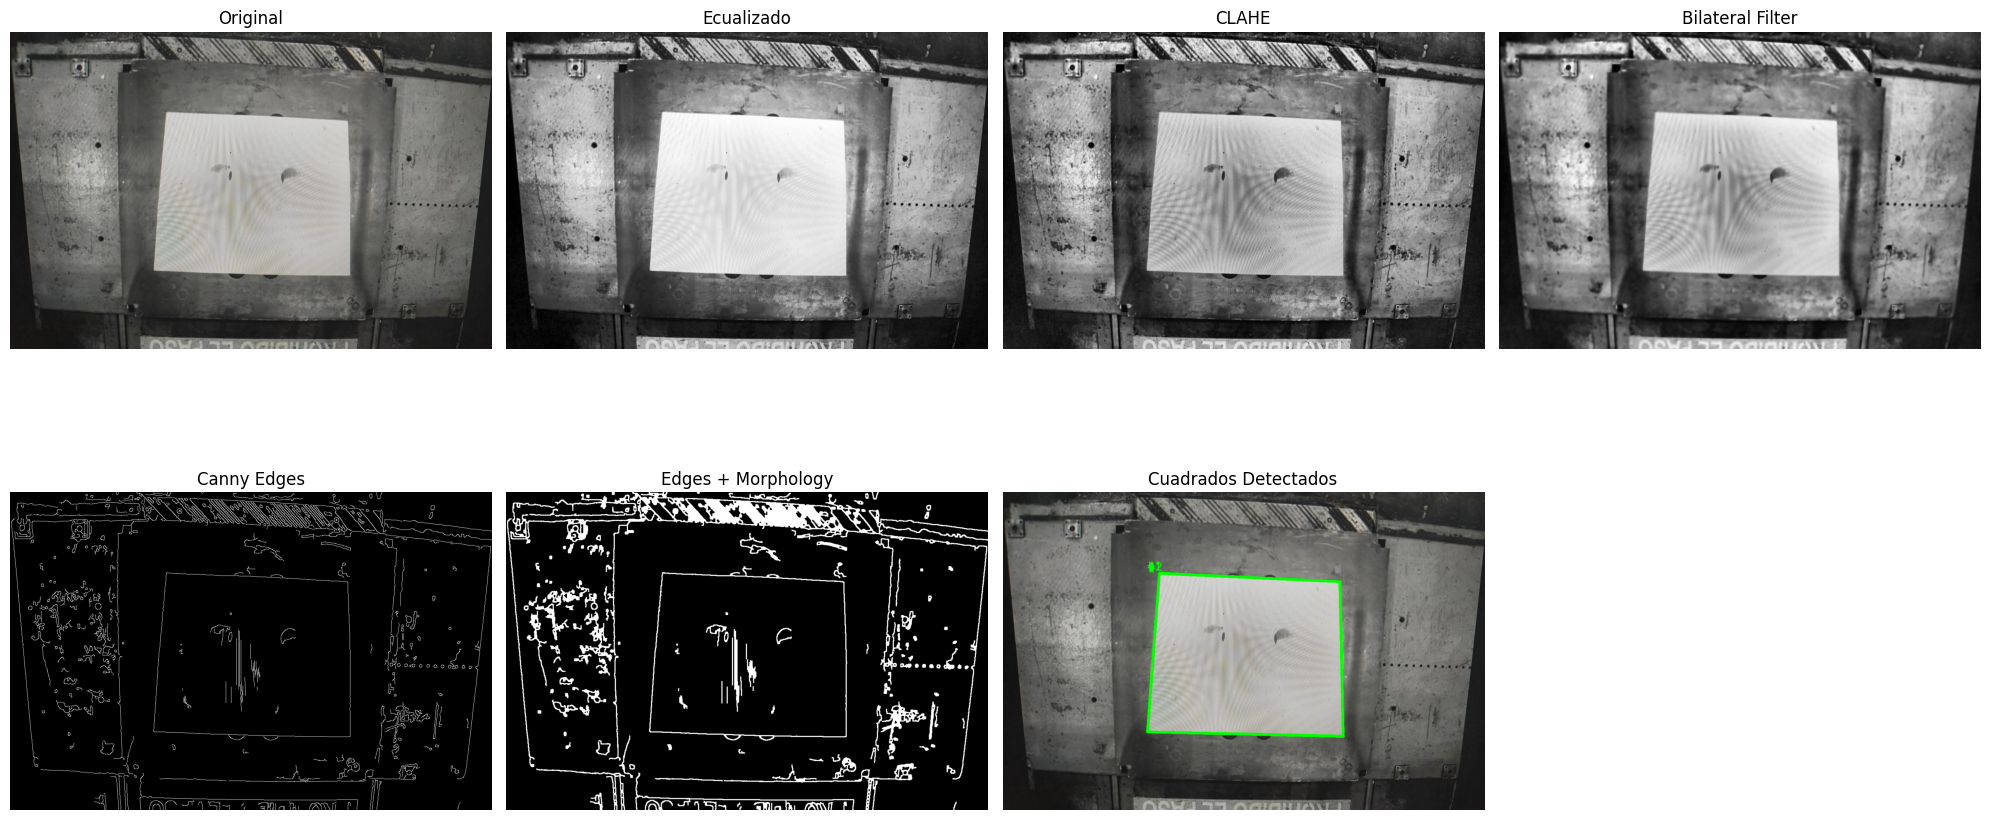

✓ Cuadrado 1 guardado: 523x437 píxeles


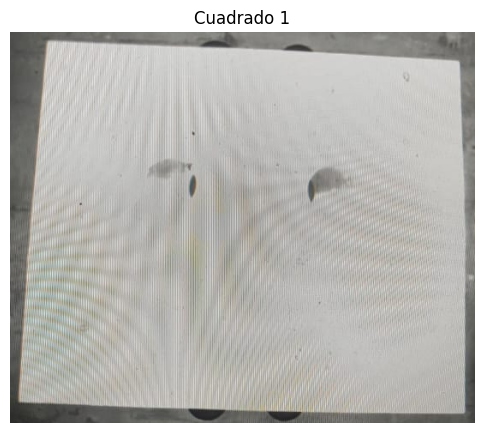

✓ Cuadrado 2 guardado: 518x431 píxeles


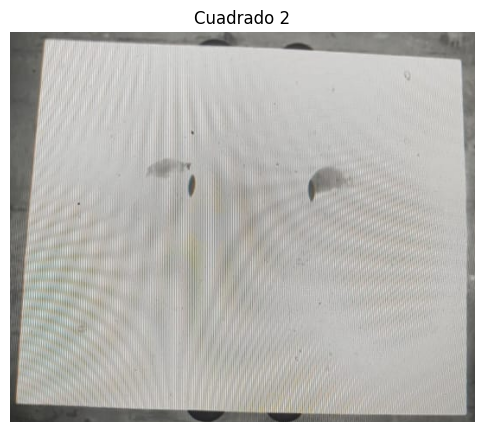

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Cargar la imagen
img = cv2.imread('cuadrado.jpg')

if img is None:
    raise FileNotFoundError("No se pudo cargar la imagen. Verifica la ruta del archivo.")

# Convertir a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# === PREPROCESAMIENTO MEJORADO ===

# 1. Ecualización de histograma para mejorar contraste
equalized = cv2.equalizeHist(gray)

# 2. Aplicar CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)

# 3. Desenfoque bilateral (preserva bordes)
bilateral = cv2.bilateralFilter(clahe_img, 9, 75, 75)

# 4. Detección de bordes con Canny (parámetros ajustados)
edges = cv2.Canny(bilateral, 30, 100, L2gradient = True)

# 5. Operaciones morfológicas para cerrar gaps
kernel = np.ones((3,3), np.uint8)
edges_closed = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel, iterations=2)
edges_dilated = cv2.dilate(edges_closed, kernel, iterations=1)

# === DETECCIÓN DE CONTORNOS ===

# Encontrar contornos
contours, hierarchy = cv2.findContours(edges_dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# Filtrar contornos
rectangulos = []
img_debug = img.copy()

print(f"Total de contornos encontrados: {len(contours)}")

for i, cnt in enumerate(contours):
    # Calcular área
    area = cv2.contourArea(cnt)
    
    # Filtrar por área mínima
    if area < 5000:  # Ajusta este valor según el tamaño de tus cuadrados
        continue
    
    # Aproximar el contorno
    perimeter = cv2.arcLength(cnt, True)
    epsilon = 0.04 * perimeter
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    
    # Obtener rectángulo delimitador
    x, y, w, h = cv2.boundingRect(approx)
    aspect_ratio = float(w) / h
    
    # Calcular qué tan lleno está el rectángulo
    rect_area = w * h
    extent = float(area) / rect_area if rect_area > 0 else 0
    
    print(f"Contorno {i}: área={area:.0f}, lados={len(approx)}, ratio={aspect_ratio:.2f}, extent={extent:.2f}")
    
    # Filtrar por características de cuadrado
    if (len(approx) >= 4 and 
        0.7 < aspect_ratio < 1.3 and 
        extent > 0.7 and
        area > 5000):
        
        rectangulos.append({
            'coords': (x, y, w, h),
            'area': area,
            'y_pos': y,
            'contour': cnt
        })
        
        # Dibujar en imagen de debug
        cv2.drawContours(img_debug, [approx], 0, (0, 255, 0), 3)
        cv2.putText(img_debug, f"#{len(rectangulos)}", (x, y-10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Ordenar por posición vertical (y)
rectangulos.sort(key=lambda r: r['y_pos'])

print(f"\nCuadrados detectados: {len(rectangulos)}")

# === VISUALIZACIÓN DE PREPROCESAMIENTO ===
plt.figure(figsize=(20, 10))

plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(equalized, cmap='gray')
plt.title('Ecualizado')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(clahe_img, cmap='gray')
plt.title('CLAHE')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(bilateral, cmap='gray')
plt.title('Bilateral Filter')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(edges, cmap='gray')
plt.title('Canny Edges')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(edges_dilated, cmap='gray')
plt.title('Edges + Morphology')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(cv2.cvtColor(img_debug, cv2.COLOR_BGR2RGB))
plt.title('Cuadrados Detectados')
plt.axis('off')

plt.tight_layout()
plt.savefig('preprocesamiento_debug.jpg', dpi=150, bbox_inches='tight')
plt.show()

# === EXTRAER Y GUARDAR CUADRADOS ===
if len(rectangulos) >= 2:
    for i, rect in enumerate(rectangulos[:2]):
        x, y, w, h = rect['coords']
        
        # Extraer con un pequeño margen
        margin = 10
        y1 = max(0, y - margin)
        y2 = min(img.shape[0], y + h + margin)
        x1 = max(0, x - margin)
        x2 = min(img.shape[1], x + w + margin)
        
        cuadrado = img[y1:y2, x1:x2]
        
        # Guardar
        cv2.imwrite(f'cuadrado_{i+1}.jpg', cuadrado)
        print(f"✓ Cuadrado {i+1} guardado: {w}x{h} píxeles")
        
        # Mostrar
        plt.figure(figsize=(6, 6))
        plt.imshow(cv2.cvtColor(cuadrado, cv2.COLOR_BGR2RGB))
        plt.title(f'Cuadrado {i+1}')
        plt.axis('off')
        plt.show()
else:
    print("\n⚠️ No se detectaron suficientes cuadrados.")
    print("Revisa la imagen 'preprocesamiento_debug.jpg' para ver qué se detectó.")
    print("\nPrueba ajustar estos parámetros:")
    print("- area > 5000  (línea 36 y 59)")
    print("- aspect_ratio entre 0.7 y 1.3 (línea 58)")
    print("- Parámetros de Canny (línea 27)")